In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
pd.options.display.float_format = '{:.2f}'.format

In [395]:
pd.set_option('display.max_columns',None)

In [396]:
df=pd.read_csv(r'C:\Users\matti\OneDrive\Desktop\Projects_Analysis\Amazon_project\Amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [397]:
df['rating_count']=df['rating_count'].fillna(0)

In [398]:
df['discounted_price']=df['discounted_price'].str.replace('₹',' ')
df['actual_price']=df['actual_price'].str.replace('₹',' ')
df['discounted_price']=df['discounted_price'].str.replace(',','')
df['actual_price']=df['actual_price'].str.replace(',','')

In [399]:
df['discounted_price']=df['discounted_price'].astype('float32')
df['actual_price']=df['actual_price'].astype('float32')

In [400]:
df=df.drop('discount_percentage',axis=1)

In [401]:
df['discounted_pct']=(df['actual_price']-df['discounted_price'])/df['actual_price']


In [402]:
df['discounted_pct']=df['discounted_pct'].round(2)

In [403]:
for i in df['rating']:
    df['rating']=df['rating'].str.replace('|','')

In [404]:
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

In [405]:
df['rating']=df['rating'].fillna(0)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        1465 non-null   object 
 1   product_name      1465 non-null   object 
 2   category          1465 non-null   object 
 3   discounted_price  1465 non-null   float32
 4   actual_price      1465 non-null   float32
 5   rating            1465 non-null   float64
 6   rating_count      1465 non-null   object 
 7   about_product     1465 non-null   object 
 8   user_id           1465 non-null   object 
 9   user_name         1465 non-null   object 
 10  review_id         1465 non-null   object 
 11  review_title      1465 non-null   object 
 12  review_content    1465 non-null   object 
 13  img_link          1465 non-null   object 
 14  product_link      1465 non-null   object 
 15  discounted_pct    1465 non-null   float32
dtypes: float32(3), float64(1), object(12)
memo

In [407]:
df['rating_count']=df['rating_count'].str.replace(',','')

In [408]:
df['rating_count']=df['rating_count'].fillna(0)

In [409]:
df['rating_count']=df['rating_count'].astype('int32')

In [410]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'rating', 'rating_count', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link', 'discounted_pct'],
      dtype='object')

In [411]:
df=df[['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discounted_pct', 'rating', 'rating_count', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link']]

In [412]:
category_split=df['category'].str.split('|',expand=True)

In [413]:
category_split.columns=['Department','Sub_department','Category','Sub_category','Family','Sub_family','Section']

In [414]:
df=df.join(category_split)

In [415]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discounted_pct', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'Department',
       'Sub_department', 'Category', 'Sub_category', 'Family', 'Sub_family',
       'Section'],
      dtype='object')

In [416]:
df=df[['product_id', 'product_name', 'Department', 'Sub_department',
       'Category', 'Sub_category', 'Family', 'Sub_family', 'Section','discounted_price',
       'actual_price', 'rating', 'rating_count', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link' ]]

In [417]:
df['margin_loss']=(df['actual_price']-df['discounted_price'])*-1

In [418]:
df['margin_loss_pct']=(df['margin_loss']/df['actual_price'])

In [419]:
df=df[['product_id', 'product_name', 'Department', 'Sub_department',
       'Category', 'Sub_category', 'Family', 'Sub_family', 'Section','discounted_price',
       'actual_price','margin_loss','margin_loss_pct', 'rating', 'rating_count', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link' ]]

In [420]:
df.head()

,product_id,product_name,Department,Sub_department,Category,Sub_category,Family,Sub_family,Section,discounted_price,actual_price,margin_loss,margin_loss_pct,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,399.00,1099.00,-700.00,-0.64,4.20,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,199.00,349.00,-150.00,-0.43,4.00,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,199.00,1899.00,-1700.00,-0.90,3.90,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,329.00,699.00,-370.00,-0.53,4.20,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,154.00,399.00,-245.00,-0.61,4.20,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [421]:
df.columns

Index(['product_id', 'product_name', 'Department', 'Sub_department',
       'Category', 'Sub_category', 'Family', 'Sub_family', 'Section',
       'discounted_price', 'actual_price', 'margin_loss', 'margin_loss_pct',
       'rating', 'rating_count', 'about_product', 'user_id', 'user_name',
       'review_id', 'review_title', 'review_content', 'img_link',
       'product_link'],
      dtype='object')

**Income/Discount - Analysis - Departments/Sub_departments/Categories/Sub_categories**

Text(0.5, 1.0, 'Loss of Margin V price')

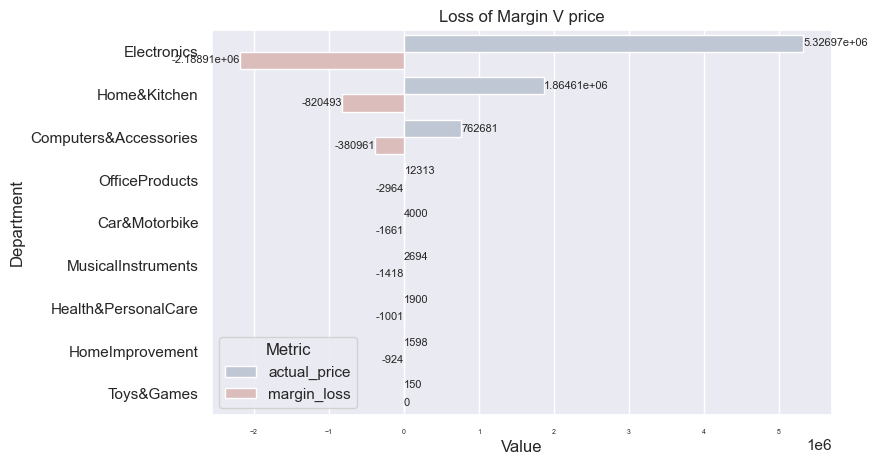

In [422]:
#Sales discounted - actual price and income loss by department
df_sales=df.groupby('Department')[['discounted_price','actual_price','margin_loss']].sum().sort_values(by='discounted_price',ascending=False).reset_index().head(10)
df_lon=pd.melt(df_sales,id_vars='Department',value_vars=['actual_price', 'margin_loss'],
                  var_name='Metric', value_name='Value')

plt.figure(figsize=(8,5))
plt.xticks(fontsize=5)
plot = sns.barplot(x='Value', y='Department', hue='Metric', data=df_lon, palette='vlag')
for container in plot.containers:
        plot.bar_label(container, fontsize=8)


plt.xlabel('Value')
plt.ylabel('Department')
plt.title('Loss of Margin V price')

In [423]:
##Sales discounted - actual price and income loss by department that is in electronics home and kitchen computers&accessories
df_sales=df.groupby(
    'Department')[['discounted_price','actual_price','margin_loss']].sum().sort_values(
        by='discounted_price',ascending=False).reset_index().head(10)
df_sales['margin_loss_pct']=df_sales['margin_loss']/df_sales['actual_price']
df_sales[['discounted_price','actual_price','margin_loss_pct']]=df_sales[['discounted_price','actual_price','margin_loss_pct']].round(2)
df_sales.style.bar(color='red',subset=['margin_loss_pct','margin_loss'],align='mid')

,Department,discounted_price,actual_price,margin_loss,margin_loss_pct
0,Electronics,3138057.000000,5326966.000000,-2188909.000000,-0.410000
1,Home&Kitchen,1044115.812500,1864609.000000,-820493.187500,-0.440000
2,Computers&Accessories,381720.625000,762681.250000,-380960.656250,-0.500000
3,OfficeProducts,9349.000000,12313.000000,-2964.000000,-0.240000
4,Car&Motorbike,2339.000000,4000.000000,-1661.000000,-0.420000
5,MusicalInstruments,1276.000000,2694.000000,-1418.000000,-0.530000
6,Health&PersonalCare,899.000000,1900.000000,-1001.000000,-0.530000
7,HomeImprovement,674.000000,1598.000000,-924.000000,-0.580000
8,Toys&Games,150.000000,150.000000,0.000000,0.000000


In [424]:
df_sub_dep=df.groupby('Sub_department')[['discounted_price','actual_price','margin_loss']].sum().sort_values(by='discounted_price',ascending=False).reset_index().head(10)
df_sub_dep['margin_loss_pct']=df_sales['margin_loss']/df_sales['actual_price']
df_sub_dep.style.bar(color='red',subset=['margin_loss_pct'],align='mid')

,Sub_department,discounted_price,actual_price,margin_loss,margin_loss_pct
0,"HomeTheater,TV&Video",1685954.000000,2792181.000000,-1106227.000000,-0.410911
1,Mobiles&Accessories,1148582.000000,1570475.000000,-421893.000000,-0.440035
2,Kitchen&HomeAppliances,663149.125000,1166096.000000,-502946.875000,-0.499502
3,"Heating,Cooling&AirQuality",373789.625000,685442.000000,-311652.375000,-0.240721
4,Accessories&Peripherals,185200.625000,426656.312500,-241455.703125,-0.415250
5,WearableTechnology,177817.000000,650162.000000,-472345.000000,-0.526355
6,"Headphones,Earbuds&Accessories",62576.000000,186070.000000,-123494.000000,-0.526842
7,ExternalDevices&DataStorage,38725.000000,77455.000000,-38730.000000,-0.578223
8,NetworkingDevices,37688.000000,73031.000000,-35343.000000,0.000000
9,Laptops,37247.000000,59890.000000,-22643.000000,nan


In [425]:
df_sub_filtered=df[df['Department'].isin(['Electronics','Home&Kitchen','Computers&Accessories'])&
   df['Sub_department'].isin(
       ['HomeTheater,TV&Video','Mobiles&Accessories','Kitchen&HomeAppliances','Heating,Cooling&AirQuality','Accessories&Peripherals','WearableTechnology'])].groupby(
           'Category')[['discounted_price','actual_price','margin_loss']].sum().sort_values(by='discounted_price',ascending=False).reset_index().head(10)
df_sub_filtered['margin_loss_pct']=df_sales['margin_loss']/df_sales['actual_price']
df_sub_filtered.style.bar(color='red',subset=['margin_loss_pct'],align='mid')

,Category,discounted_price,actual_price,margin_loss,margin_loss_pct
0,Televisions,1608017.000000,2620347.000000,-1012330.000000,-0.410911
1,Smartphones&BasicMobiles,1086799.000000,1419754.000000,-332955.000000,-0.440035
2,SmallKitchenAppliances,337756.125000,579344.000000,-241587.859375,-0.499502
3,"Vacuum,Cleaning&Ironing",206827.000000,349129.000000,-142302.000000,-0.240721
4,SmartWatches,177817.000000,650162.000000,-472345.000000,-0.415250
5,WaterHeaters&Geysers,137634.000000,256420.000000,-118786.000000,-0.526355
6,RoomHeaters,106418.773438,181032.000000,-74613.226562,-0.526842
7,WaterPurifiers&Accessories,91067.000000,198045.000000,-106978.000000,-0.578223
8,Cables&Accessories,85718.617188,217397.312500,-131678.703125,0.000000
9,MobileAccessories,61783.000000,150721.000000,-88938.000000,nan


In [426]:
df.groupby('product_name')[['discounted_price','margin_loss']].sum().reset_index().sort_values(by='margin_loss',ascending=True)


,product_name,discounted_price,margin_loss
384,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",8995.00,-91000.00
1018,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,77990.00,-61910.00
272,"Coway Professional Air Purifier for Home, Long...",14400.00,-45500.00
390,"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Ca...",11997.00,-40000.00
981,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",37990.00,-37009.00
...,...,...,...
554,Kitchenwell Multipurpose Portable Electronic D...,239.00,0.00
553,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,79.00,0.00
1135,VR 18 Pcs - 3 Different Size Plastic Food Snac...,89.00,0.00
783,"Parker Quink Ink Bottle, Blue",100.00,0.00


**Discount Distribution**

c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


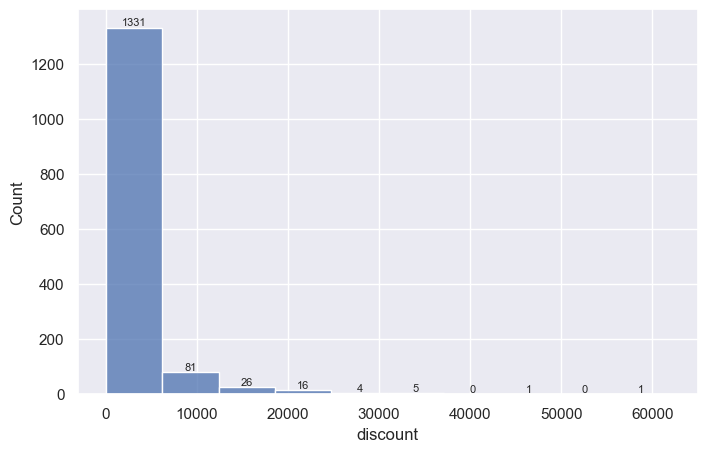

In [427]:
df['discount']=df['actual_price']-df['discounted_price']
plt.figure(figsize=(8,5))
plot2=sns.histplot(data=df['discount'],bins=10)
for container in plot2.containers:
        plot2.bar_label(container, fontsize=8)


**Sentiment Analysis**

In [428]:
df.columns

Index(['product_id', 'product_name', 'Department', 'Sub_department',
       'Category', 'Sub_category', 'Family', 'Sub_family', 'Section',
       'discounted_price', 'actual_price', 'margin_loss', 'margin_loss_pct',
       'rating', 'rating_count', 'about_product', 'user_id', 'user_name',
       'review_id', 'review_title', 'review_content', 'img_link',
       'product_link', 'discount'],
      dtype='object')

**Reviews per Department**

Text(0.5, 1.0, 'Qty review by Department')

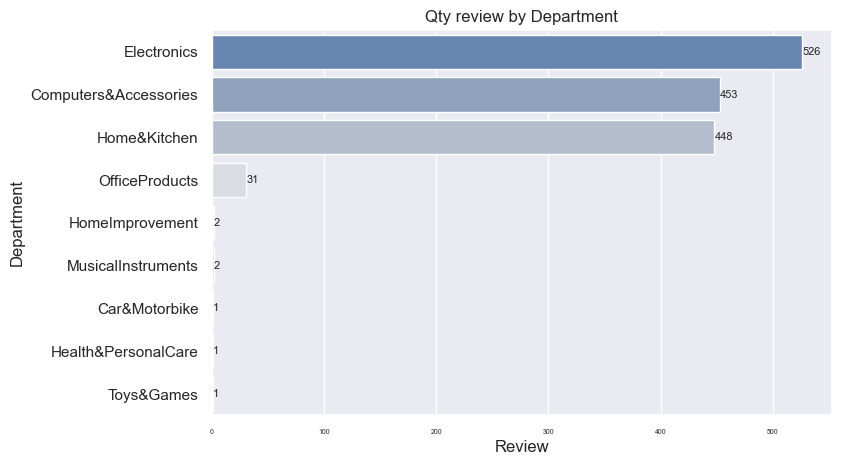

In [461]:
df_qty=df.groupby('Department')[['rating_count']].size().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,5))
plt.xticks(fontsize=5)
plot=sns.barplot(x=0,y='Department',data=df_qty,palette='vlag')
for container in plot.containers:
        plot.bar_label(container, fontsize=8)


plt.xlabel('Review')
plt.ylabel('Department')
plt.title('Qty review by Department')

**General Review Rating Distribution**

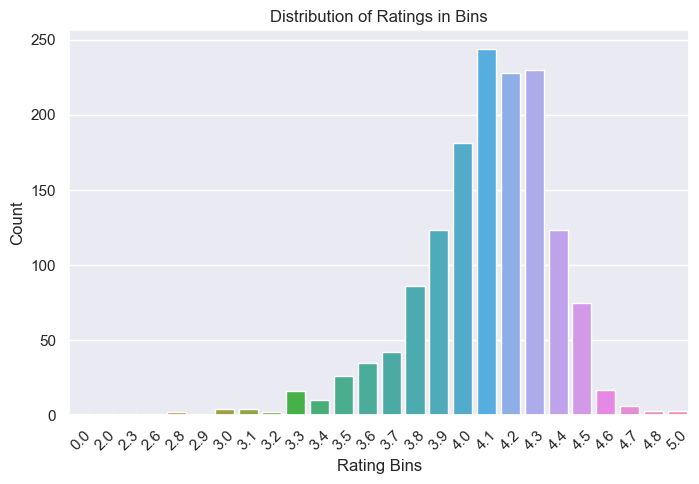

In [430]:
plot_rating=df.groupby('rating')['product_id'].size().reset_index(name='count')
sns.barplot(x='rating',y='count',data=plot_rating)
plt.xlabel('Rating Bins')
plt.ylabel('Count')
plt.title('Distribution of Ratings in Bins')
plt.xticks(rotation=45)
plt.show()

In [453]:
df['rating'].value_counts(normalize=True).head(10)

rating
4.10   0.17
4.30   0.16
4.20   0.16
4.00   0.12
3.90   0.08
4.40   0.08
3.80   0.06
4.50   0.05
3.70   0.03
3.60   0.02
Name: proportion, dtype: float64

**Rating Distribution by Departemnt**

[None]

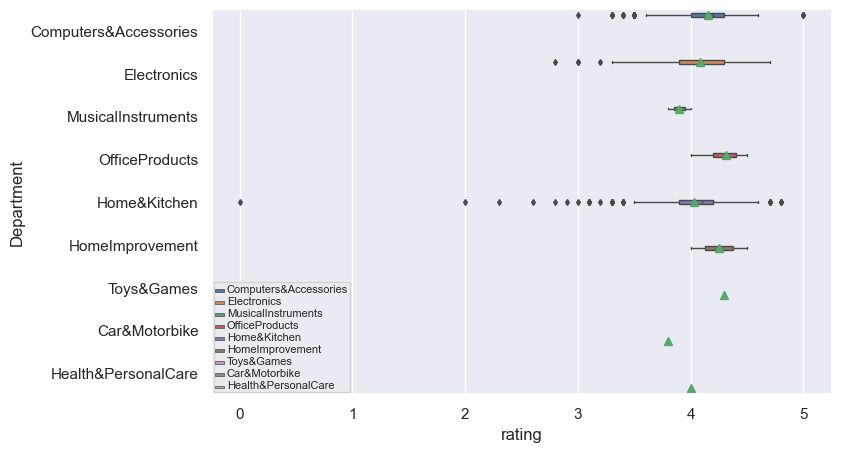

In [432]:
sns.set_theme(rc={'figure.figsize':(8,5)})
plot3=sns.boxplot(y='Department',x='rating',hue='Department',data=df,showmeans=True,fliersize=3, linewidth=1)

plot3.legend(fontsize=3)
plt.setp(plot3.get_legend().get_texts(), fontsize='8')
plt.setp(plot3.get_legend().get_title(), fontsize='8') 


**Is there any relationship between the Discount and the Rating?**

In [464]:
df_relation=df[['Department', 'Sub_department',
       'Category', 'Sub_category', 'Family', 'Sub_family', 'Section','discounted_price',
       'actual_price','margin_loss','margin_loss_pct', 'rating','rating_count']]
df_relation['abs_discount_pct']=df_relation['margin_loss_pct']*-1


C:\Users\matti\AppData\Local\Temp\ipykernel_3476\535290010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relation['abs_discount_pct']=df_relation['margin_loss_pct']*-1


In [465]:
df_relation.columns

Index(['Department', 'Sub_department', 'Category', 'Sub_category', 'Family',
       'Sub_family', 'Section', 'discounted_price', 'actual_price',
       'margin_loss', 'margin_loss_pct', 'rating', 'rating_count',
       'abs_discount_pct'],
      dtype='object')

**The correlation index is already showing that the the discount doesn't have any influence on the rate given by customers**

*However we are going to plot it in order to be sure*

In [466]:
corr=df_relation.abs_discount_pct.corr(df_relation.rating)
print('Correlation coefficient between X and Y:', round(corr, 2))

Correlation coefficient between X and Y: -0.13


In [467]:
def lin_reg(x,y):

    X_mean=np.mean(x)
    Y_mean=np.mean(y)

    X_mean_dev=[el-X_mean for el in x]
    Y_mean_dev=[el-Y_mean for el in y]

    XY_covar=np.sum(np.array(X_mean_dev)*np.array(Y_mean_dev))
    X_var=np.sum(np.array(X_mean_dev)**2)

    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean

    return b_1,b_0


In [468]:
intercept,slope=lin_reg(x=df_relation['abs_discount_pct'],y=df_relation['rating']) 

print('Intercept:',intercept)
print('Slope:', slope)

Intercept: -0.1903833630471894
Slope: 4.184572561298755


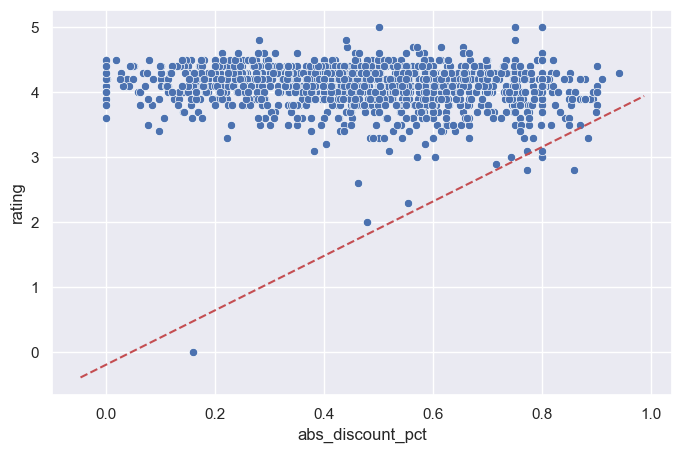

In [469]:
sns.scatterplot(x='abs_discount_pct',y='rating',data=df_relation)

axes = plt.gca() 
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals 
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

(0.0, 5.0)

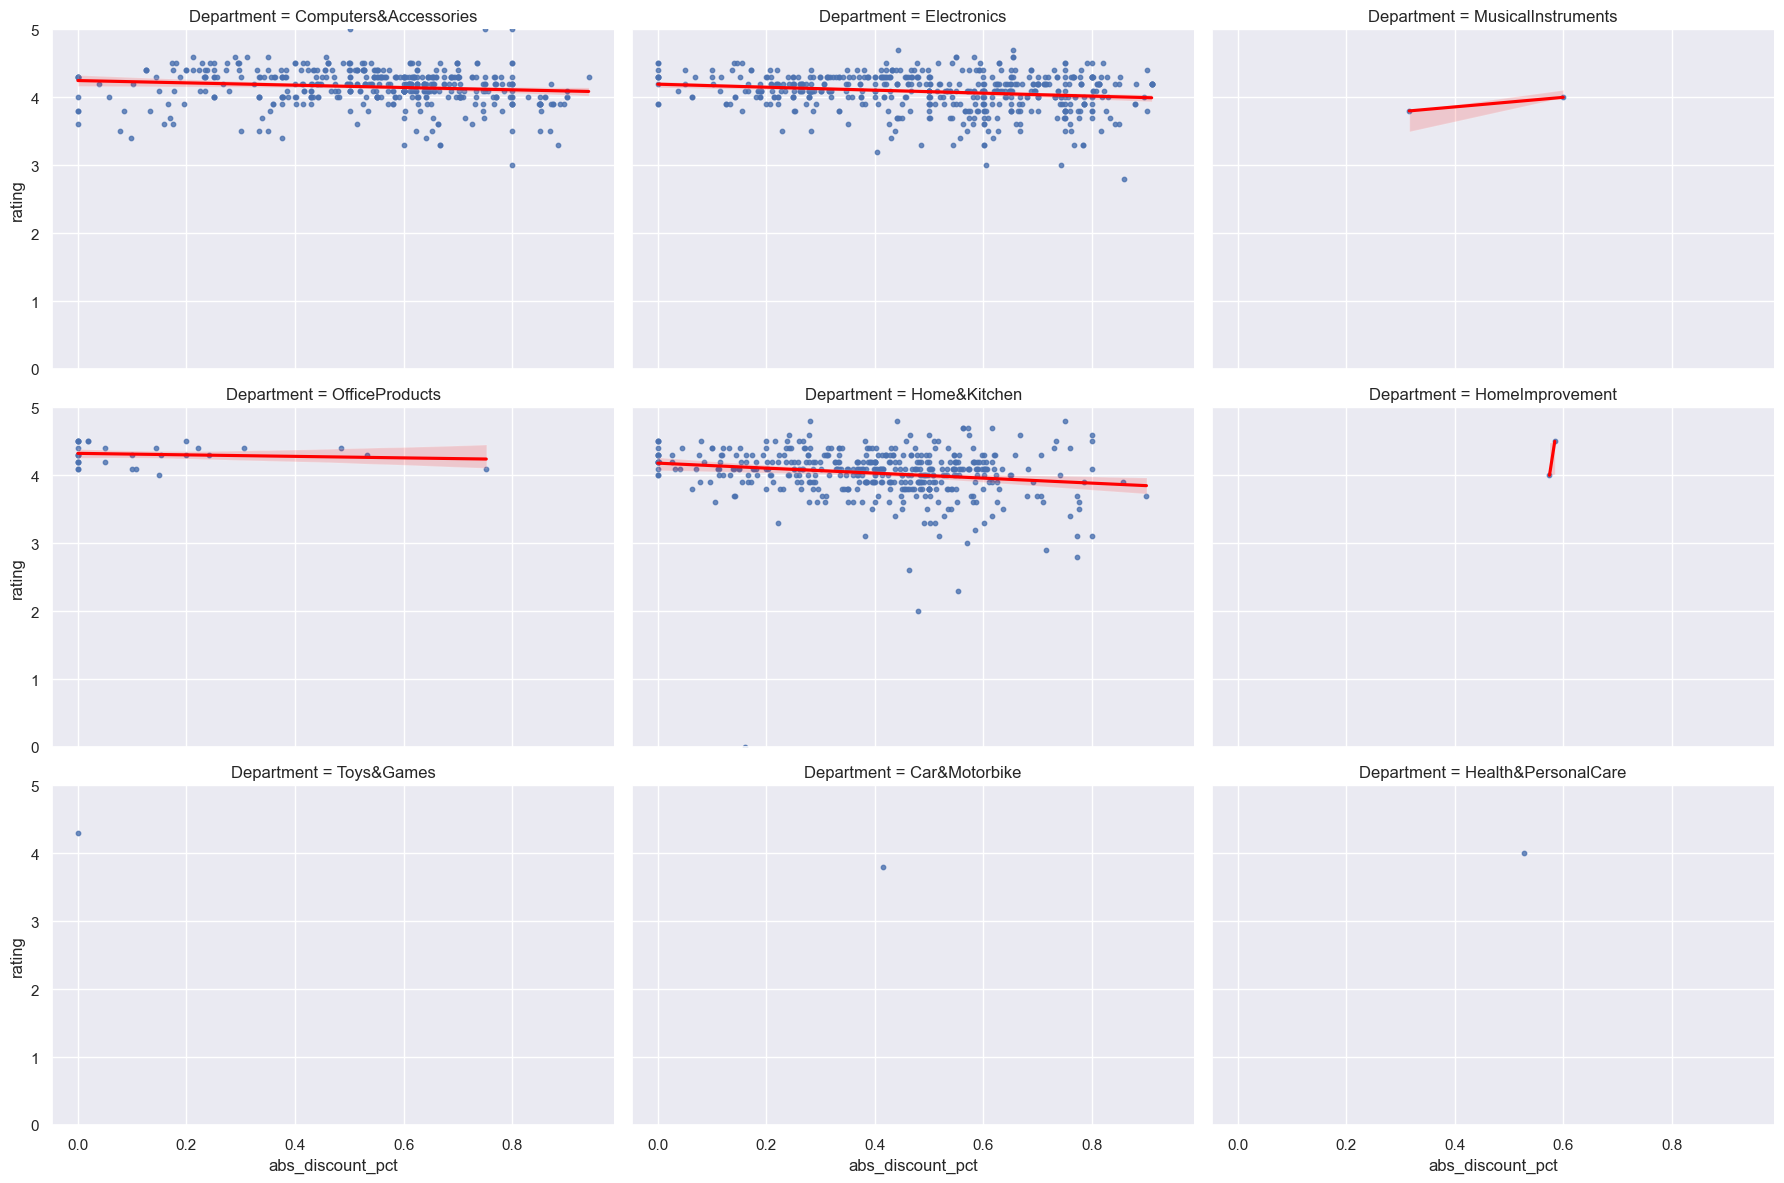

In [471]:
g = sns.FacetGrid(df_relation, col='Department', col_wrap=3, height=4, aspect=1.5)
g.map(sns.regplot, 'abs_discount_pct','rating', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.ylim(0,5)

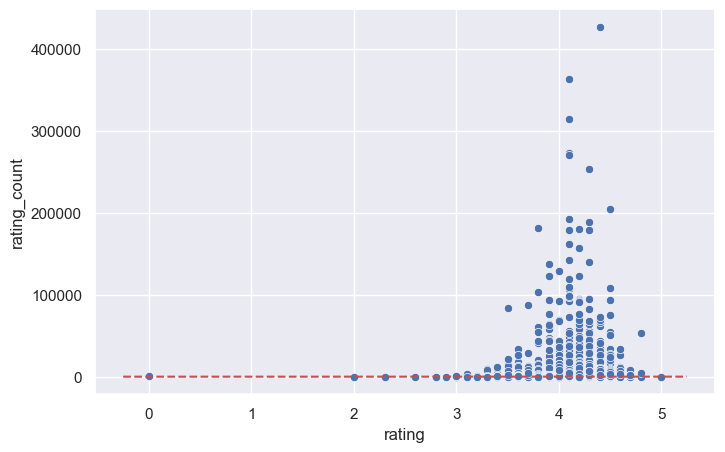

In [473]:
sns.scatterplot(x='rating',y='rating_count',data=df_relation)

axes = plt.gca() 
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals 
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

**Sentiment Analysis on Review**

In [436]:
df_prod_rate_top=df.groupby('product_name')['rating'].median().sort_values(ascending=False).reset_index().head(10)
colormap=sns.light_palette('green',as_cmap=True)
df_prod_rate_top.style.background_gradient(cmap=colormap,subset='rating')


,product_name,rating
0,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.000000
1,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.000000
2,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.000000
3,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.800000
4,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.800000
5,"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.800000
6,"Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)",4.700000
7,Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB),4.700000
8,"FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)",4.700000
9,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),4.700000


In [437]:
df_prod_rate_bott=df.groupby('product_name')['rating'].median().sort_values(ascending=False).reset_index().tail(10)
colormap1=sns.light_palette('red',as_cmap=True)
df_prod_rate_bott.style.background_gradient(cmap=colormap1,subset='rating')

,product_name,rating
1327,7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,3.000000
1328,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",3.000000
1329,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer and Cutter Handheld Sealing Machine Portable Bag Resealer Sealer for Plastic Bags Food Storage Snack Fresh Bag Sealer (Including 2 AA Battery)",3.000000
1330,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,2.900000
1331,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",2.800000
1332,SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black),2.800000
1333,Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging,2.600000
1334,"Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)",2.300000
1335,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,2.000000
1336,"Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)",0.000000


**Review Analysis-Polarity and Subjectivity**

In [553]:
grouped_reviews = df[['product_id','product_name','review_content','rating']]
grouped_reviews

,product_id,product_name,review_content,rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Looks durable Charging is fine tooNo complains...,4.20
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,I ordered this cable to connect my phone to An...,4.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"Not quite durable and sturdy,https://m.media-a...",3.90
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"Good product,long wire,Charges good,Nice,I bou...",4.20
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"Bought this instead of original apple, does th...",4.20
...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,"I received product without spanner,Excellent p...",4.00
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"ok,got everything as mentioned but the measuri...",4.10
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"plastic but cool body ,u have to find sturdy s...",3.60
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,I have installed this in my kitchen working fi...,4.00


In [554]:
from textblob import TextBlob

In [555]:
score1=grouped_reviews[['product_id','product_name','review_content','rating']]

score1['polarity']=0.0 #initialization of the 2 column with value 0
score1['subjectivity']=0.0

for index,row in score1.iterrows(): #iterrow to loop on every row
    blob=TextBlob(row['review_content']) #for any row in review title give me textbolb
    score1.at[index,'polarity']=blob.sentiment.polarity #at usuful to update polarity and subjectivity to the current index of the value calculated by textblob
    score1.at[index,'subjectivity']=blob.sentiment.subjectivity
 

In [556]:

colormap=sns.light_palette('green',as_cmap=True)
score1.head().style.bar(subset=['polarity','subjectivity'],color=['red','green'],align='mid')

,product_id,product_name,review_content,rating,polarity,subjectivity
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",4.200000,0.481944,0.675000
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)","I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it's good one and charging power is too good and also supports fast charging,Value for money, with extra length👍,Good, working fine,Product quality is good,Good,very good,Bought for my daughter's old phone.Brand new cable it was not charging, I already repacked and requested for replacement.I checked again, and there was some green colour paste/fungus inside the micro USB connector. I cleaned with an alcoholic and starts working again.Checked the ampere of charging speed got around 1400ma-1500ma - not bad, came with braided 1.5m long cable, pretty impressive for the price.Can't blame the manufacturer.But quality issues by the distributor, they might have stored in very humid place.",4.000000,0.274318,0.509394
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/61bKp9YO6wL._SY88.jpg,Product,Very nice product,Working well,It's a really nice product",3.900000,0.600000,1.000000
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)","Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product",4.200000,0.240370,0.544444
4,B08CF3B7N1,"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)","Bought this instead of original apple, does the work for 150rs, not as fast as apple charger but its a good option if you want cheap and good product, bought it for iPad pro 10.5 and it's working flawlessly, build quality is ok, its not like i am gonna hang my clothes on it and i want a very strong cable, even a braided cable stop working after a year, i have used both Anker and Apple store strong braided cable they all stop working after a year so please don't buy high end cables just for that instead choose a this one and even if it's stop

In [558]:
general=score1.groupby(['product_id','product_name'])[['polarity','subjectivity','rating']].mean()
general.style.bar(subset=['polarity','subjectivity','rating'],color=['red','green'])

,,polarity,subjectivity,rating
product_id,product_name,,,
B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adapter (Black),0.290625,0.310417,4.100000
B002SZEOLG,"TP-Link Nano USB WiFi Dongle 150Mbps High Gain Wireless Network Wi-Fi Adapter for PC Desktop and Laptops, Supports Windows 10/8.1/8/7/XP, Linux, Mac OS X (TL-WN722N)",0.278941,0.536487,4.200000
B003B00484,Duracell Plus AAA Rechargeable Batteries (750 mAh) Pack of 4,0.388312,0.482468,4.300000
B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, 800 DPI Optical Tracking, Ambidextrous PC/Mac/Laptop - Black",0.679091,0.500000,4.300000
B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop",0.190055,0.534891,4.500000
B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,0.380000,0.500000,4.300000
B005LJQMCK,"BlueRigger Digital Optical Audio Toslink Cable (3.3 Feet / 1 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)",0.218519,0.521296,4.200000
B005LJQMZC,"BlueRigger Digital Optical Audio Toslink Cable (6 Feet / 1.8 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)",0.218519,0.521296,4.200000
B006LW0WDQ,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,0.184837,0.516885,4.400000


In [560]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [577]:
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [579]:
score1['sentiment_score']=score1['review_content'].apply(get_sentiment)

In [580]:
def classify_sentiment(score):
    if score>0.05:
        return 'Positive'
    elif score <-0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [582]:
score1['sentiment']=score1['sentiment_score'].apply(classify_sentiment)
score1

,product_id,product_name,review_content,rating,polarity,subjectivity,sentiment,sentiment_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Looks durable Charging is fine tooNo complains...,4.20,0.48,0.68,Positive,0.90
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,I ordered this cable to connect my phone to An...,4.00,0.27,0.51,Positive,0.99
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"Not quite durable and sturdy,https://m.media-a...",3.90,0.60,1.00,Positive,0.71
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"Good product,long wire,Charges good,Nice,I bou...",4.20,0.24,0.54,Positive,0.83
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"Bought this instead of original apple, does th...",4.20,0.26,0.64,Positive,1.00
...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,"I received product without spanner,Excellent p...",4.00,0.32,0.57,Positive,0.94
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"ok,got everything as mentioned but the measuri...",4.10,0.14,0.59,Positive,0.95
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"plastic but cool body ,u have to find sturdy s...",3.60,0.21,0.71,Positive,0.97
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,I have installed this in my kitchen working fi...,4.00,-0.17,0.49,Negative,-0.30
